In [1]:
import pandas as pd
import os
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [3]:
url_train = 'https://raw.githubusercontent.com/Sinu-Tech/Precificacao-De-Celulares/main/train.csv'
base_treino = pd.read_csv(url_train)

url_test = 'https://raw.githubusercontent.com/Sinu-Tech/Precificacao-De-Celulares/main/test.csv'
base_teste = pd.read_csv(url_test)

In [ ]:
base_treino.describe()

In [ ]:
base_treino.isnull().sum()

In [ ]:
grafico = px.box(base_treino, y='battery_power')
grafico.show()

grafico = px.box(base_treino, y='clock_speed')
grafico.show()

grafico = px.box(base_treino, y='fc')
grafico.show()

grafico = px.box(base_treino, y='int_memory')
grafico.show()

grafico = px.box(base_treino, y='mobile_wt')
grafico.show()

grafico = px.box(base_treino, y='n_cores')
grafico.show()

grafico = px.box(base_treino, y='pc')
grafico.show()

grafico = px.box(base_treino, y='px_height')
grafico.show()

grafico = px.box(base_treino, y='px_width')
grafico.show()

grafico = px.box(base_treino, y='ram')
grafico.show()

grafico = px.box(base_treino, y='sc_h')
grafico.show()

grafico = px.box(base_treino, y='sc_w')
grafico.show()

grafico = px.box(base_treino, y='talk_time')
grafico.show()

grafico = px.box(base_treino, y='price_range')
grafico.show()


In [4]:
base_teste.drop(["id"], axis=1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [5]:
atributos = base_treino.iloc[:, :20]
print(atributos)

classes = base_treino.loc[:, ['price_range']]
print(classes)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0       0

In [9]:
def qt():
  qt = preprocessing.QuantileTransformer() 
  atributos_normalizados = qt.fit_transform(atributos)
  return  atributos_normalizados

In [10]:
def mas():
  mas = preprocessing.MaxAbsScaler()
  atributos_normalizados = mas.fit_transform(atributos)
  return  atributos_normalizados

In [11]:
def nm():
  nm = preprocessing.Normalizer()
  atributos_normalizados = nm.fit_transform(atributos)  
  return  atributos_normalizados

In [12]:
def ss():
  ss = preprocessing.StandardScaler()
  atributos_normalizados = ss.fit_transform(atributos)
  return  atributos_normalizados

In [6]:
def mms():
  mms = preprocessing.MinMaxScaler()
  atributos_normalizados = mms.fit_transform(atributos)
  return  atributos_normalizados

In [7]:
atributos_normalizados = mms()

Ericles

In [13]:
def decision_tree_classifier():

  modelo = DecisionTreeClassifier()
  modelo.fit(atributos_normalizados, classes)

  print(f'Acurácia: {modelo.score(atributos_normalizados, classes)*100}')

  pred = modelo.predict(atributos)

  print(f'Esperado: {classes}, resultado: {pred}')

def dtc(atributos_normalizados):
  modelo = DecisionTreeClassifier()
  modelo.fit(atributos_normalizados, classes)
  return modelo.score(atributos_normalizados, classes)*100

Joanne

In [14]:
def perceptron():

  modelo = Perceptron()
  modelo.fit(atributos_normalizados, classes)

  print(f'Acurácia: {modelo.score(atributos_normalizados, classes)*100}')

  pred = modelo.predict(atributos)

  print(f'Esperado: {classes}, resultado: {pred}')

def per(atributos_normalizados):
  modelo = Perceptron()
  modelo.fit(atributos_normalizados, classes)
  return modelo.score(atributos_normalizados, classes)*100

Milena

In [15]:
def naive_bayes():

  modelo = GaussianNB()
  modelo.fit(atributos_normalizados, classes)

  print(f'Acurácia: {modelo.score(atributos_normalizados, classes)*100}')

  pred = modelo.predict(atributos)

  print(f'Esperado: {classes}, resultado: {pred}')

def nai(atributos_normalizados):
  modelo = GaussianNB()
  modelo.fit(atributos_normalizados, classes)
  return modelo.score(atributos_normalizados, classes)*100

Kendy

In [37]:
def k_neighbors_classifier():

  modelo = KNeighborsClassifier(n_neighbors=3)
  modelo.fit(atributos_normalizados, classes)

  print(f'Acurácia: {modelo.score(atributos_normalizados, classes)*100}')

  pred = modelo.predict(atributos)

  print(f'Esperado: {classes}, resultado: {pred}')

def knn(atributos_normalizados):
  modelo = KNeighborsClassifier()
  modelo.fit(atributos_normalizados, classes)
  return modelo.score(atributos_normalizados, classes)*100

Thiago

In [17]:
def svc():

  modelo = SVC()
  modelo.fit(atributos_normalizados, classes)

  print(f'Acurácia: {modelo.score(atributos_normalizados, classes)*100}')

  pred = modelo.predict(atributos)

  print(f'Esperado: {classes}, resultado: {pred}')

def svm(atributos_normalizados):
  modelo = SVC()
  modelo.fit(atributos_normalizados, classes)
  return modelo.score(atributos_normalizados, classes)*100

Menu

In [18]:

def linha(tamanho=42):
    return '-' * tamanho


def cabecalho(menu):
    print(linha())
    print(menu.center(42))
    print(linha())


def algoritmos():
    print("1 - Árvore de decisão")
    print("2 - KNN")
    print("3 - Naive Bayes")
    print("4 - Perceptron")
    print("5 - SVC")
    print("6 - Comparar acurácia de todos os algoritmos")
    print("0 - Sair")


def opcoes():
    op = '1' 
    while op!='0':
      os.system('cls')
      algoritmos();
      op = input("Digite o respectivo número referente ao algoritmo: ")
      if op=='1':
        decision_tree_classifier()
      elif op=='2':
        k_neighbors_classifier()
      elif op=='3':
        naive_bayes()
      elif op=='4':
        perceptron()
      elif op=='5':
        svc()
      elif op=='6':
        comparar_resultados()
      elif op!='0':
        print('Opção inválida')
      input("Digite qualquer tecla para continuar: ")

Menu(FALTA IMPLEMENTAR A OPÇÃO DE COMPARAR OS RESULTADOS)

In [ ]:

cabecalho("ALGORITMOS DE CLASSIFICAÇÃO");
opcoes();

Comparações

In [ ]:
def comparar_resultados():
  resultados = {}

  resultados['DecisionTreeClassifier-QuantileTransformer'] = dtc(qt())
  resultados['Perceptron-QuantileTransformer'] = per(qt())
  resultados['NaiveBayes-QuantileTransformer'] = nai(qt())
  resultados['KNeighborsClassifier-QuantileTransformer'] = knn(qt())
  resultados['SupportVectorMachine-QuantileTransformer'] = svm(qt())

  resultados['DecisionTreeClassifier-MaxAbsScaler'] = dtc(mas())
  resultados['Perceptron-MaxAbsScaler'] = per(mas())
  resultados['NaiveBayes-MaxAbsScaler'] = nai(mas())
  resultados['KNeighborsClassifier-MaxAbsScaler'] = knn(mas())
  resultados['SupportVectorMachine-MaxAbsScaler'] = svm(mas())

  resultados['DecisionTreeClassifier-Normalizer'] = dtc(nm())
  resultados['Perceptron-Normalizer'] = per(nm())
  resultados['NaiveBayes-Normalizer'] = nai(nm())
  resultados['KNeighborsClassifier-Normalizer'] = knn(nm())
  resultados['SupportVectorMachine-Normalizer'] = svm(nm())

  resultados['DecisionTreeClassifier-StandardScaler'] = dtc(ss())
  resultados['Perceptron-StandardScaler'] = per(ss())
  resultados['NaiveBayes-StandardScaler'] = nai(ss())
  resultados['KNeighborsClassifier-StandardScaler'] = knn(ss())
  resultados['SupportVectorMachine-StandardScaler'] = svm(ss())

  resultados['DecisionTreeClassifier-MinMaxScaler'] = dtc(mms())
  resultados['Perceptron-MinMaxScaler'] = per(mms())
  resultados['NaiveBayes-MinMaxScaler'] = nai(mms())
  resultados['KNeighborsClassifier-MinMaxScaler'] = knn(mms())
  resultados['SupportVectorMachine-MinMaxScaler'] = svm(mms())


  resultados = sorted(resultados.items(), key=lambda x:x[1])
  resultados = dict(resultados)

  algoritmos = list(resultados.keys())
  acuracias = list(resultados.values())

  fig, ax = plt.subplots(figsize=(35,20), sharey=True)

  bars = ax.barh(algoritmos, acuracias)
  ax.set_title('Taxa de acurácia dos algoritmos testados', fontsize=35)

  acuracias_graph = []
  for acuracia in acuracias:
    acuracia = round(acuracia,2)
    acuracias_graph.append(acuracia)

  for i, v in enumerate(acuracias_graph):
    if v == 100:
      cor = 'green'
    elif v >= 70:
      cor = 'blue'
    elif v >= 50:
      cor = 'maroon'
    else:
      cor = 'red'

  ax.text(v + 1, i - 0.25 , str(v)+'%', color=cor, fontweight='bold', fontsize=16)

Teste para IphoneX e LG L3

In [70]:
iphoneX = [{'baterry_power': 2716, 'blue':1, 'clock_speed': 2.4, 'dual_sim': 0, 'fc': 12,'four_g': 1, 'int_memory':256, 'm_dep': 0.8, 'mobile_wt': 174, 'n_cores': 3, 'pc': 12, 'px_height': 2436, 'px_width': 1125, 'ram': 3064, 'sc_h': 14, 'sc_w': 7, 'talk_time': 21, 'three_g': 1, 'touch_screen': 1, 'wifi': 1}]
iphoneX = pd.DataFrame(iphoneX)
iphoneXClasse = [3]

modelo = DecisionTreeClassifier(max_depth = 5)
modelo.fit(atributos_normalizados, classes)

pred = modelo.predict(iphoneX)

print(f'esperado: {iphoneXClasse}, resultado: {pred}')

"""Mostra a porcentagem de acertos"""

accuracy_score(pred, iphoneXClasse)*100

esperado: [3], resultado: [3]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


100.0

In [73]:
lgL3 = [{'baterry_power': 1500, 'blue':1, 'clock_speed': 0.8, 'dual_sim': 0, 'fc': 0,'four_g': 0, 'int_memory':2, 'm_dep': 1.2, 'mobile_wt': 110, 'n_cores': 1, 'pc': 3, 'px_height':320, 'px_width':240, 'ram': 384, 'sc_h': 10, 'sc_w': 6, 'talk_time': 10, 'three_g': 1, 'touch_screen': 1, 'wifi': 1}]
lgL3 = pd.DataFrame(lgL3)
lgL3Classe = [1]

modelo = SVC()
modelo.fit(atributos_normalizados, classes)

pred = modelo.predict(lgL3)

print(f'esperado: {lgL3Classe}, resultado: {pred}')

"""Mostra a porcentagem de acertos"""

accuracy_score(pred, lgL3Classe)*100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


esperado: [1], resultado: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


100.0

FIGURA

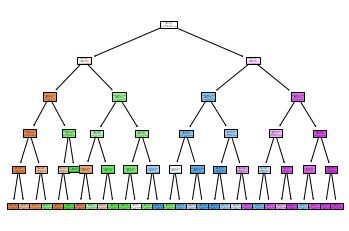

In [71]:
from sklearn import tree
tree.plot_tree(modelo,feature_names = atributos.columns, 
               class_names=['0','1','2','3'],
               filled = True);